In [1]:
from scipy.stats import shapiro as stats_shapiro, kruskal as stats_kruskal, f_oneway
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [2]:
import pandas as pd

In [3]:
import scikit_posthocs

In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

In [6]:
models = ['sophia-dt', 'sophia-gb', 'sophia-knn', 'sophia-mlp', 'sophia-rf', 'sophia-svm']

In [7]:
def report_folder_n(label, fold_no=10):
    f1_scores = []
    accuracies = []
    all_predictions = []
    all_labels = []
    
    for n in range(30):
        predictions = []
        labels = []
        for i in range(1, fold_no + 1):
            with open('results/' + label + '/' + str(n) + '/' + str(i) + '-predicted.txt', 'r') as file:
                for _predictions in file.readlines():
                    predictions += list(_predictions)[:-1]
                    
            with open('results/' + label + '/' + str(n) + '/' + str(i) + '-label.txt', 'r') as file:
                for _labels in file.readlines():
                    labels += list(_labels)[:-1]
                    
        all_predictions += predictions            
        all_labels += labels           
        f1_scores.append(f1_score(labels, predictions, average='weighted'))
        accuracies.append(accuracy_score(labels, predictions))
    
    print(classification_report(all_labels, all_predictions))
    return f1_scores, accuracies

/home/daniel/.local/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [8]:
def shapiro(model):
    print("====> Shapiro-Wilk for " + model)
    f1_scores, accuracies = report_folder_n(model)
    p_value_f1 = stats_shapiro(f1_scores)[1]
    p_value_accuracy = stats_shapiro(accuracies)[1]
    
    print("    p-value F1-score: " + str(p_value_f1), end=" ")
    if p_value_f1 < 0.05:
        print("not gaussian")
    else:
        print("gaussian")
        
    print("    p-value Accuracy: " + str(p_value_accuracy), end=" ")
    if p_value_accuracy < 0.05:
        print("not gaussian\n")
    else:
        print("gaussian\n")

In [11]:
list(map(shapiro, models))

====> Shapiro-Wilk for sophia-svm
    p-value F1-score: 0.7518213987350464 gaussian
    p-value Accuracy: 0.25722047686576843 gaussian

====> Shapiro-Wilk for sophia-dt
    p-value F1-score: 0.7776756286621094 gaussian
    p-value Accuracy: 0.7414937615394592 gaussian

====> Shapiro-Wilk for sophia-rf
    p-value F1-score: 0.8499969840049744 gaussian
    p-value Accuracy: 0.9732885360717773 gaussian

====> Shapiro-Wilk for sophia-gb
    p-value F1-score: 0.48902201652526855 gaussian
    p-value Accuracy: 0.3950154185295105 gaussian

====> Shapiro-Wilk for sophia-knn
    p-value F1-score: 0.25500810146331787 gaussian
    p-value Accuracy: 0.4573189616203308 gaussian

====> Shapiro-Wilk for sophia-mlp
    p-value F1-score: 0.1459038257598877 gaussian
    p-value Accuracy: 0.3176412880420685 gaussian



[None, None, None, None, None, None]

In [7]:
results = list(map(report_folder_n, models))
f1_scores = list(map(lambda x: x[0], results))
accuracies = list(map(lambda x: x[1], results))
f1_kruskal = stats_kruskal(*f1_scores)
acc_kruskal = stats_kruskal(*accuracies)
print(f1_kruskal, acc_kruskal)

KruskalResult(statistic=204.56278041074245, pvalue=2.0268028141574008e-41) KruskalResult(statistic=204.2983128256996, pvalue=2.307423016562743e-41)


In [9]:
results = list(map(report_folder_n, models))
f1_scores = list(map(lambda x: x[0], results))
accuracies = list(map(lambda x: x[1], results))
f1_kruskal = f_oneway(*f1_scores)
acc_kruskal = f_oneway(*accuracies)
print(f1_kruskal, acc_kruskal)

F_onewayResult(statistic=7402.3933035493355, pvalue=1.249442042850079e-200) F_onewayResult(statistic=6957.286189371347, pvalue=2.6811625899873087e-198)


In [10]:
import numpy as np

In [11]:
def groups(models):
    arr = []
    for i in models:
        arr += ([i] * 30)
    return arr

In [12]:
models_up = ['DT', 'GB', 'KNN', 'MLP', 'RF', 'SVM']

In [29]:
list(zip(groups(models_up), np.array(f1_scores).flatten()))

[('DT', 0.6768099691267666),
 ('DT', 0.6763118061824077),
 ('DT', 0.6701837695853339),
 ('DT', 0.6701979466888847),
 ('DT', 0.6730299953105665),
 ('DT', 0.689350051364522),
 ('DT', 0.6739827952575823),
 ('DT', 0.6820233092614671),
 ('DT', 0.6866124065285695),
 ('DT', 0.6815688493484376),
 ('DT', 0.677186730235149),
 ('DT', 0.6687390518756814),
 ('DT', 0.6774651101858814),
 ('DT', 0.6871631587239556),
 ('DT', 0.6749845157646297),
 ('DT', 0.6825692968068053),
 ('DT', 0.6799637452474976),
 ('DT', 0.677540154774489),
 ('DT', 0.6757798249226559),
 ('DT', 0.6803047723959144),
 ('DT', 0.6671120149927864),
 ('DT', 0.675828197682865),
 ('DT', 0.672959746165463),
 ('DT', 0.6823841669807044),
 ('DT', 0.6781876196817639),
 ('DT', 0.6761160185634679),
 ('DT', 0.6794647105242221),
 ('DT', 0.6879178409295609),
 ('DT', 0.6841861524451888),
 ('DT', 0.676355751148489),
 ('GB', 0.7679199794624634),
 ('GB', 0.7711759441671632),
 ('GB', 0.7694467709205493),
 ('GB', 0.7627753871786439),
 ('GB', 0.7708542077

In [13]:
f1_scores_df = pd.DataFrame({'score': np.array(f1_scores).flatten(), 'group': groups(models_up)}) 

In [14]:
accuracy_df = pd.DataFrame({'score': np.array(accuracies).flatten(), 'group': groups(models_up)})

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    DT     GB   0.0901  -0.0  0.0876  0.0926   True
    DT    KNN    0.013  -0.0  0.0105  0.0155   True
    DT    MLP   0.0432  -0.0  0.0407  0.0457   True
    DT     RF   0.1079  -0.0  0.1054  0.1104   True
    DT    SVM  -0.0246  -0.0 -0.0271 -0.0222   True
    GB    KNN  -0.0771  -0.0 -0.0796 -0.0746   True
    GB    MLP  -0.0469  -0.0 -0.0494 -0.0444   True
    GB     RF   0.0178  -0.0  0.0153  0.0202   True
    GB    SVM  -0.1147  -0.0 -0.1172 -0.1123   True
   KNN    MLP   0.0302  -0.0  0.0277  0.0326   True
   KNN     RF   0.0949  -0.0  0.0924  0.0973   True
   KNN    SVM  -0.0376  -0.0 -0.0401 -0.0352   True
   MLP     RF   0.0647  -0.0  0.0622  0.0672   True
   MLP    SVM  -0.0678  -0.0 -0.0703 -0.0653   True
    RF    SVM  -0.1325  -0.0  -0.135   -0.13   True
---------------------------------------------------


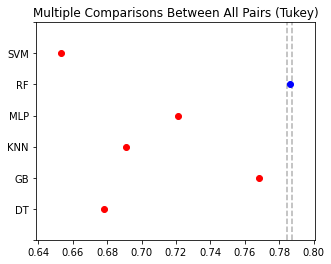

In [16]:
m_comp = pairwise_tukeyhsd(endog=f1_scores_df['score'], groups=f1_scores_df['group'], alpha=0.05)
print(m_comp)
fig = m_comp.plot_simultaneous(comparison_name="RF", figsize=(5, 4))
fig.savefig('f1-tukey.png')

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    DT     GB    0.117  -0.0  0.1143  0.1198   True
    DT    KNN   0.0227  -0.0    0.02  0.0254   True
    DT    MLP   0.0555  -0.0  0.0528  0.0582   True
    DT     RF   0.1327  -0.0    0.13  0.1354   True
    DT    SVM   0.0165  -0.0  0.0138  0.0192   True
    GB    KNN  -0.0943  -0.0 -0.0971 -0.0916   True
    GB    MLP  -0.0615  -0.0 -0.0643 -0.0588   True
    GB     RF   0.0157  -0.0   0.013  0.0184   True
    GB    SVM  -0.1005  -0.0 -0.1032 -0.0978   True
   KNN    MLP   0.0328  -0.0  0.0301  0.0355   True
   KNN     RF     0.11  -0.0  0.1073  0.1127   True
   KNN    SVM  -0.0062   0.0 -0.0089 -0.0035   True
   MLP     RF   0.0772  -0.0  0.0745  0.0799   True
   MLP    SVM   -0.039  -0.0 -0.0417 -0.0363   True
    RF    SVM  -0.1162  -0.0 -0.1189 -0.1135   True
---------------------------------------------------


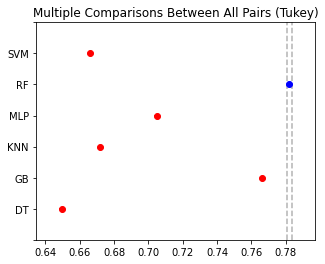

In [17]:
m_comp = pairwise_tukeyhsd(endog=accuracy_df['score'], groups=accuracy_df['group'], alpha=0.05)
print(m_comp)
fig = m_comp.plot_simultaneous(comparison_name="RF", figsize=(5, 4))
fig.savefig('accuracy-tukey.png')